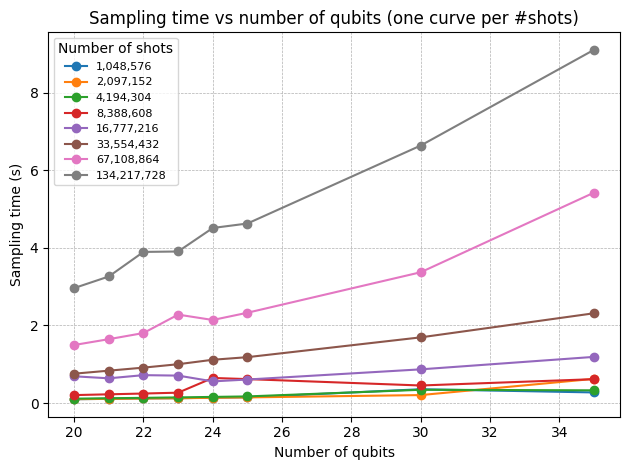

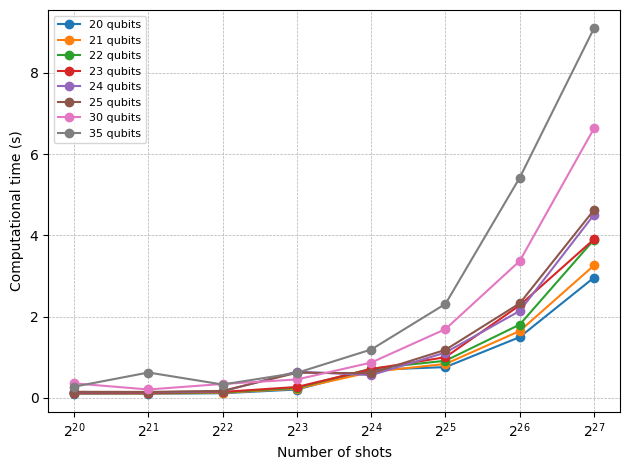

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Columns = number of qubits, Rows = number of shots, Values = sampling time (seconds)
qubits = [20, 21, 22, 23, 24, 25, 30, 35]
shots = [1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728]

times = [
    [0.0971, 0.1086, 0.1191, 0.1246, 0.1374, 0.1476, 0.3550, 0.2727],
    [0.0997, 0.1063, 0.1167, 0.1224, 0.1352, 0.1446, 0.2046, 0.6228],
    [0.1120, 0.1228, 0.1333, 0.1446, 0.1575, 0.1699, 0.3408, 0.3269],
    [0.2040, 0.2243, 0.2446, 0.2665, 0.6457, 0.6161, 0.4515, 0.6147],
    [0.6884, 0.6367, 0.7182, 0.7065, 0.5574, 0.6054, 0.8676, 1.1889],
    [0.7558, 0.8336, 0.9119, 0.9996, 1.1147, 1.1815, 1.6919, 2.3126],
    [1.4949, 1.6450, 1.8031, 2.2780, 2.1394, 2.3262, 3.3695, 5.4211],
    [2.9612, 3.2605, 3.8933, 3.9042, 4.5101, 4.6254, 6.6345, 9.1012],
]

df = pd.DataFrame(times, index=shots, columns=qubits)
df.index.name = "number_of_shots"
df.columns.name = "number_of_qubits"

# Figure 1: time vs qubits (one line per shot count)
plt.figure()
for s in df.index:
    plt.plot(df.columns, df.loc[s].values, marker="o", label=f"{s:,}")
plt.xlabel("Number of qubits")
plt.ylabel("Sampling time (s)")
plt.title("Sampling time vs number of qubits (one curve per #shots)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="Number of shots", fontsize=8)
plt.tight_layout()
plt.savefig("time_vs_qubits_by_shots.png", dpi=300)

# Figure 2: time vs shots (one line per qubit count), log-x is usually helpful here
plt.figure()
for q in df.columns:
    plt.plot(df.index, df[q].values, marker="o", label=f"{q} qubits")
plt.xscale("log", base=2)
plt.xlabel("Number of shots")
plt.ylabel("Computational time (s)")
# plt.title("Sampling time vs number of shots (one curve per #qubits)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig("tmax1.png", dpi=300)

plt.show()

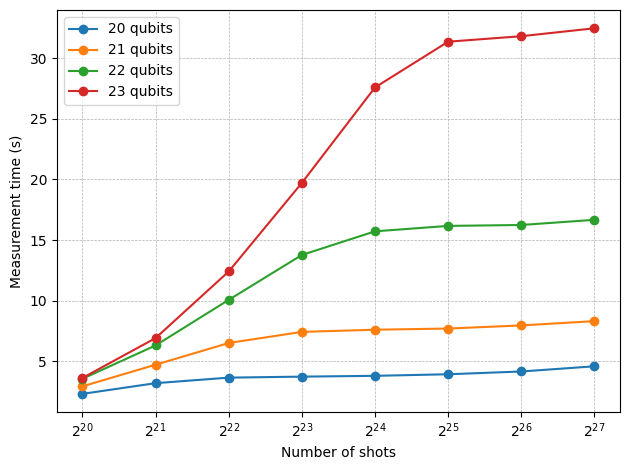

In [22]:

# Rows = number of shots (x-axis), Columns = number of qubits (separate curves)
shots = [1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728]
qubits = [20, 21, 22, 23]

times = [
    [2.2919, 2.9127, 3.5400, 3.6065],
    [3.1740, 4.6998, 6.2929, 6.9013],
    [3.6314, 6.4931, 10.0577, 12.4028],
    [3.7131, 7.4097, 13.7654, 19.7219],
    [3.7805, 7.5897, 15.7177, 27.6060],
    [3.9103, 7.6868, 16.1661, 31.3846],
    [4.1382, 7.9436, 16.2420, 31.8369],
    [4.5679, 8.2985, 16.6681, 32.4925],
]

df = pd.DataFrame(times, index=shots, columns=qubits)
df.index.name = "number_of_shots"
df.columns.name = "number_of_qubits"

plt.figure()
for q in df.columns:
    plt.plot(df.index, df[q].values, marker="o", label=f"{q} qubits")

plt.xscale("log", base=2)  # shots are powers of 2; makes spacing readable
plt.xlabel("Number of shots")
plt.ylabel("Measurement time (s)")
# plt.title("Measurement time vs number of shots")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("tmax2.png", dpi=300)
plt.show()

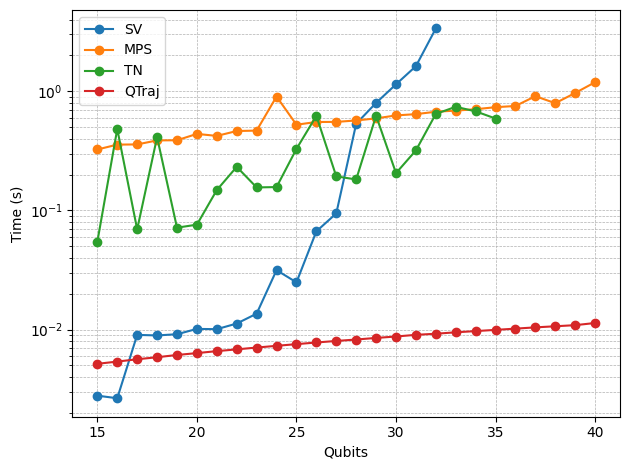

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

data = """Qubits\tSV\tMPS\tTN\tQTraj
15\t0.002786875\t0.324659348\t0.054567099\t0.00515713
16\t0.00265193\t0.356666803\t0.482568502\t0.00538519
17\t0.009022236\t0.358027935\t0.06928587\t0.00563222
18\t0.008924484\t0.386925936\t0.411752701\t0.00585836
19\t0.009137154\t0.388118267\t0.071638346\t0.00611755
20\t0.010127783\t0.438765049\t0.075944424\t0.00634416
21\t0.010075092\t0.422110319\t0.148210049\t0.00659067
22\t0.011234045\t0.463873863\t0.232161522\t0.00681978
23\t0.013589621\t0.467690706\t0.155960321\t0.00706196
24\t0.031516314\t0.903434753\t0.157015562\t0.00730215
25\t0.024908543\t0.524051666\t0.328251839\t0.0075439
26\t0.066729069\t0.552472115\t0.621946573\t0.00778838
27\t0.094339371\t0.553266287\t0.193028212\t0.00802453
28\t0.534203529\t0.569034815\t0.181938648\t0.00824836
29\t0.799135447\t0.592041969\t0.62402463\t0.00850628
30\t1.143780947\t0.627196312\t0.205626488\t0.0087432
31\t1.624904871\t0.64282155\t0.319049597\t0.00903082
32\t3.365437984\t0.673408031\t0.645686388\t0.00922381
33\t/\t0.688189268\t0.740999937\t0.00948216
34\t/\t0.706963301\t0.678204298\t0.00970665
35\t/\t0.735437393\t0.590656996\t0.00993875
36\t/\t0.752592325\t/\t0.0101801
37\t/\t0.909192801\t/\t0.0104314
38\t/\t0.794556856\t/\t0.0106548
39\t/\t0.967761993\t/\t0.0108877
40\t/\t1.191596746\t/\t0.0113514
"""

df = pd.read_csv(StringIO(data), sep="\t")

# Convert "/" to NaN, and numeric columns to float
for col in ["SV", "MPS", "TN", "QTraj"]:
    df[col] = pd.to_numeric(df[col].replace("/", np.nan), errors="coerce")

plt.figure()
for col in ["SV", "MPS", "TN", "QTraj"]:
    plt.plot(df["Qubits"], df[col], marker="o", label=col)

plt.xlabel("Qubits")
plt.ylabel("Time (s)")
# plt.title("Runtime vs Qubits (SV / MPS / TN / QTraj)")
plt.yscale("log")  # helpful since ranges differ a lot; remove if you want linear
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("ghz.png", dpi=300)
plt.show()

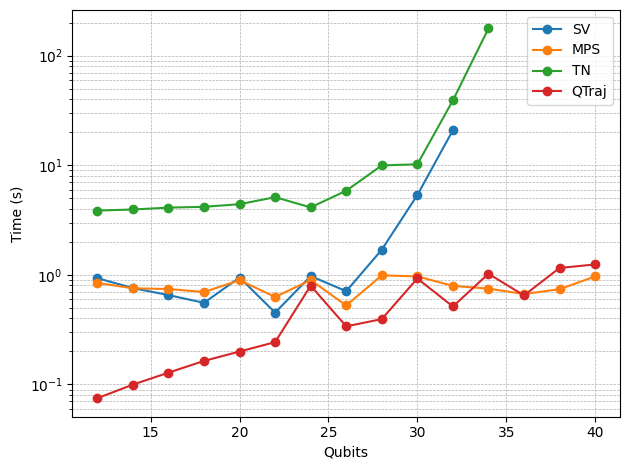

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

data = """Qubits\tSV\tMPS\tTN\tQTraj
12\t0.932843\t0.843751\t3.855154\t0.0749439
14\t0.75757\t0.753937\t3.944297\t0.0997872
16\t0.65372\t0.742326\t4.103269\t0.128239
18\t0.55564\t0.697408\t4.172238\t0.164095
20\t0.945731\t0.893481\t4.410506\t0.199898
22\t0.452405\t0.628681\t5.106068\t0.243419
24\t0.973982\t0.896617\t4.123102\t0.796803
26\t0.709251\t0.525434\t5.850094\t0.339018
28\t1.696363\t0.989722\t9.954728\t0.394819
30\t5.338475\t0.967847\t10.18581\t0.92625
32\t20.831389\t0.793531\t38.975778\t0.514545
34\t/\t0.748673\t176.4905\t1.02295
36\t/\t0.668375\t/\t0.649343
38\t/\t0.739523\t/\t1.15549
40\t/\t0.966771\t/\t1.24406
"""

df = pd.read_csv(StringIO(data), sep="\t")

# Convert "/" to NaN and coerce numeric
for col in ["SV", "MPS", "TN", "QTraj"]:
    df[col] = pd.to_numeric(df[col].replace("/", np.nan), errors="coerce")

plt.figure()
for col in ["SV", "MPS", "TN", "QTraj"]:
    plt.plot(df["Qubits"], df[col], marker="o", label=col)

plt.xlabel("Qubits")
plt.ylabel("Time (s)")
# plt.title("Runtime vs Qubits (SV / MPS / TN / QTraj)")
plt.yscale("log")  # remove if you prefer linear
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("adder.png", dpi=300)
plt.show()

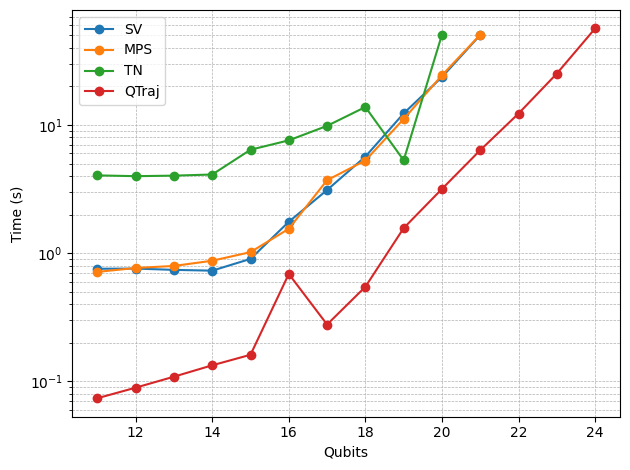

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

data = """Qubits\tSV\tMPS\tTN\tQTraj
11\t0.7559\t0.7146\t4.041126\t0.0739728
12\t0.7583\t0.7665\t3.983059\t0.0894261
13\t0.741\t0.7951\t4.022408\t0.108914
14\t0.7305\t0.8731\t4.103498\t0.133597
15\t0.9024\t1.0189\t6.402755\t0.161392
16\t1.7567\t1.5494\t7.577718\t0.688743
17\t3.1081\t3.706\t9.828396\t0.277806
18\t5.6595\t5.2763\t13.784568\t0.547044
19\t12.2902\t11.1168\t5.29798\t1.56744
20\t23.5956\t24.3517\t50.482652\t3.16778
21\t50.2352\t50.4606\t/\t6.35217
22\t\t\t/\t12.2629
23\t\t\t/\t25.1238
24\t\t\t/\t56.4498
"""

df = pd.read_csv(StringIO(data), sep="\t")

# Clean: "" and "/" -> NaN, then numeric
for col in ["SV", "MPS", "TN", "QTraj"]:
    df[col] = pd.to_numeric(df[col].replace({"/": np.nan, "": np.nan}), errors="coerce")

plt.figure()
for col in ["SV", "MPS", "TN", "QTraj"]:
    plt.plot(df["Qubits"], df[col], marker="o", label=col)

plt.xlabel("Qubits")
plt.ylabel("Time (s)")
# plt.title("Runtime vs Qubits (SV / MPS / TN / QTraj)")
plt.yscale("log")  # remove if you prefer linear
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("qft.png", dpi=300)
plt.show()

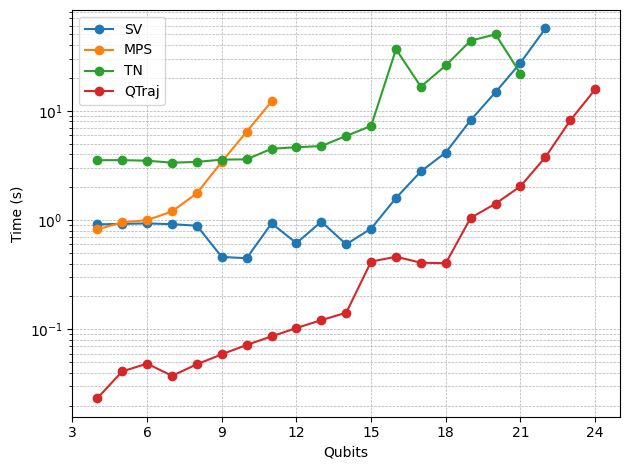

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from matplotlib.ticker import MaxNLocator

data = """Qubits\tSV\tMPS\tTN\tQTraj
4\t0.91319\t0.823111\t3.530335\t0.0234215
5\t0.922937\t0.95203\t3.533512\t0.0412738
6\t0.931659\t0.999078\t3.493839\t0.0485334
7\t0.916816\t1.198047\t3.347918\t0.0375535
8\t0.887635\t1.760961\t3.406118\t0.047887
9\t0.459557\t3.416134\t3.57317\t0.0590885
10\t0.447645\t6.439126\t3.595728\t0.0719958
11\t0.932819\t12.169602\t4.494476\t0.0861748
12\t0.615582\t/\t4.641425\t0.10286
13\t0.967472\t/\t4.754081\t0.121376
14\t0.600097\t/\t5.891155\t0.142043
15\t0.83506\t/\t7.264528\t0.416758
16\t1.592405\t/\t36.570626\t0.461632
17\t2.787217\t/\t16.606144\t0.407191
18\t4.151363\t/\t25.999389\t0.40286
19\t8.205762\t/\t43.87284\t1.04815
20\t14.805793\t/\t49.9847\t1.41311
21\t27.437769\t/\t21.915538\t2.03562
22\t56.625183\t/\t/\t3.75759
23\t/\t/\t/\t8.15555
24\t/\t/\t/\t15.6711
"""

df = pd.read_csv(StringIO(data), sep="\t")

# Clean: "/", "pass", "" -> NaN, then convert to floats
bad = {"/": np.nan, "pass": np.nan, "": np.nan}
for col in ["SV", "MPS", "TN", "QTraj"]:
    df[col] = pd.to_numeric(df[col].replace(bad), errors="coerce")

plt.figure()
for col in ["SV", "MPS", "TN", "QTraj"]:
    plt.plot(df["Qubits"], df[col], marker="o", label=col)

plt.xlabel("Qubits")
plt.ylabel("Time (s)")
# plt.title("Runtime vs Qubits (SV / MPS / TN / QTraj)")
plt.yscale("log")  # remove if you prefer linear
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
# Force integer ticks on the x-axis
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.savefig("dnn.png", dpi=300)

In [ ]:
# # Plot a circuit from the provided OpenQASM 2.0 string
# # pip install qiskit matplotlib pylatexenc

# from qiskit import QuantuQTrajircuit
# from IPython.display import display

# qasm_str = r"""
# OPENQASM 2.0;
# include "qelib1.inc";
# qreg q[3];
# creg meas[3];
# U(pi/2,0,pi) q[2];
# U(0,0,pi/4) q[2];
# cx q[2],q[1];
# U(0,0,-pi/4) q[1];
# cx q[2],q[1];
# U(0,0,pi/4) q[1];
# U(pi/2,0,pi) q[1];
# U(0,0,pi/4) q[1];
# U(0,0,pi/8) q[2];
# cx q[2],q[0];
# U(0,0,-pi/8) q[0];
# cx q[2],q[0];
# U(0,0,pi/8) q[0];
# cx q[1],q[0];
# U(0,0,-pi/4) q[0];
# cx q[1],q[0];
# U(0,0,pi/4) q[0];
# U(pi/2,0,pi) q[0];
# """

# qc = QuantuQTrajircuit.from_qasm_str(qasm_str)

# fig = qc.draw(output="mpl", fold=-1)
# display(fig)

# # Save to file
# fig.savefig("adder2.png", dpi=300, bbox_inches="tight")
# # fig.savefig("qasm_circuit.pdf", bbox_inches="tight")

ImportError: cannot import name 'QuantuQTrajircuit' from 'qiskit' (/opt/miniconda3/lib/python3.13/site-packages/qiskit/__init__.py)

In [ ]:
# from qiskit import QuantuQTrajircuit
# from numpy import pi

# def qft_circuit(circuit, n):
#     """Applies QFT to the first n qubits of a circuit."""
    
#     # --- Part 1: Rotations and Hadamards ---
#     for i in range(n):
#         # Apply Hadamard to the current qubit
#         circuit.h(i)
        
#         # Apply Controlled-Phase rotations to all less significant qubits
#         for j in range(i + 1, n):
#             # The angle decreases for qubits further away: pi / 2^(j - i)
#             circuit.cp(pi / 2**(j - i), j, i)
            
#     # --- Part 2: Swaps ---
#     # Swap qubits to reverse the order (optional, but necessary for a "textbook" QFT)
#     # for i in range(n // 2):
#     #     circuit.swap(i, n - 1 - i)
#     return circuit

# # Example: 3-qubit QFT
# qc_manual = QuantuQTrajircuit(3)
# qft_circuit(qc_manual, 3)
# print(qc_manual.draw('mpl', filename='qft_circuit.png'))

Figure(872.774x284.278)


: 

: 

: 

: 

/var/folders/py/qyy5zgj9015b95lnw4100mv80000gn/T/ipykernel_20487/287696055.py:11: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n, do_swaps=True), range(n))


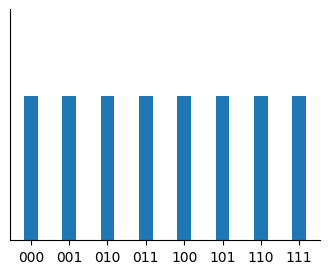

saved to: qft3_hist.png
min/max prob: 0.12499999999999994 0.12499999999999994


: 

: 

: 

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# from qiskit import QuantuQTrajircuit
# from qiskit.circuit.library import QFT
# from qiskit.quantum_info import Statevector

# n = 3

# qc = QuantuQTrajircuit(n)
# qc.append(QFT(n, do_swaps=True), range(n))

# sv = Statevector.from_instruction(qc)
# probs = np.real_if_close(sv.probabilities())

# labels = [format(i, f"0{n}b") for i in range(2**n)]

# plt.figure(figsize=(4, 3))
# x = np.arange(len(labels))
# plt.bar(x, probs, width=0.35)
# plt.xticks(x, labels)

# plt.ylim(0, 0.2)
# # plt.xlabel("Basis state")
# # plt.ylabel("Count")

# plt.yticks([])  # 不显示 y 轴数字

# ax = plt.gca()
# # 只保留左、下轴；去掉右、上边框
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# # plt.tight_layout()
# out_path = "qft3_hist.png"
# plt.savefig(out_path, bbox_inches="tight")
# plt.show()

# print("saved to:", out_path)
# plt.show()

# print("min/max prob:", probs.min(), probs.max())

/var/folders/py/qyy5zgj9015b95lnw4100mv80000gn/T/ipykernel_20487/3664300605.py:28: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n, do_swaps=True), range(n))


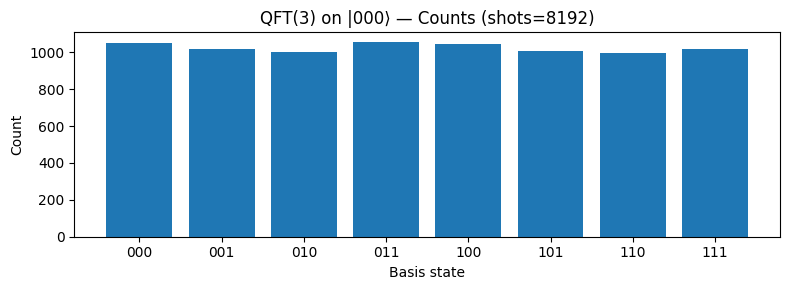

{'000': 1048, '001': 1019, '010': 999, '011': 1055, '100': 1046, '101': 1008, '110': 998, '111': 1019}


: 

: 

: 

: 

: 

: 

: 

: 